In [45]:
import pandas as pd
import numpy as np

In [46]:
data=pd.read_csv('ratings_Beauty.csv')

In [47]:
data.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1.369699e+09
1,A3JM6GV9MNOF9X,0558925278,3.0,1.355443e+09
2,A1Z513UWSAAO0F,0558925278,5.0,1.404691e+09
3,A1WMRR494NWEWV,0733001998,4.0,1.382573e+09
4,A3IAAVS479H7M7,0737104473,1.0,1.274227e+09


In [48]:
data.shape

(283092, 4)

**Recommendation system part I: Product pupularity based system targetted at new customers**



In [49]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn
from sklearn.decomposition import TruncatedSVD


In [50]:
data=data.dropna()

In [51]:
data.shape

(283091, 4)

In [52]:
data.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1.369699e+09
1,A3JM6GV9MNOF9X,0558925278,3.0,1.355443e+09
2,A1Z513UWSAAO0F,0558925278,5.0,1.404691e+09
3,A1WMRR494NWEWV,0733001998,4.0,1.382573e+09
4,A3IAAVS479H7M7,0737104473,1.0,1.274227e+09


In [53]:
popular_product=pd.DataFrame(data.groupby('ProductId')['Rating'].count())

In [54]:
popular_product.shape

(20409, 1)

In [55]:
popular_product.head(2)

,Rating
ProductId,
0205616461,1
0558925278,2


In [56]:
most_popular=popular_product.sort_values('Rating',ascending=False)

In [57]:
most_popular.head(10)

,Rating
ProductId,
B0009V1YR8,2869
B0000YUXI0,2143
B000FS05VG,1589
B000142FVW,1558
B00021DVCQ,1051
B0002JKPA4,1046
B000ASDGK8,888
B00016XJ4M,845
B0009FHJRS,828


<Axes: xlabel='ProductId'>

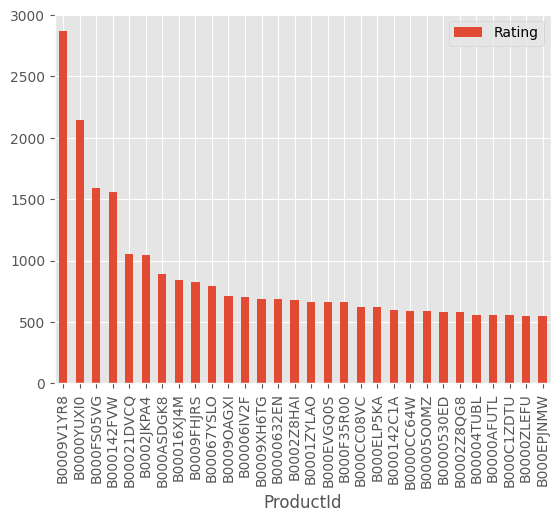

In [58]:
most_popular.head(30).plot(kind="bar")

Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc.

**Recommendation System - Part II**
Model-based collaborative filtering system
Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

**Utility Matrix based on products sold and user reviews**

**Utility Matrix :** An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all the items in the list, hence, most of the values are unknown.

In [59]:
#subsest of rating
data1=data.head(10000)

In [60]:
data1.head(2)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1.369699e+09
1,A3JM6GV9MNOF9X,0558925278,3.0,1.355443e+09


In [61]:
utility_matrix=data1.pivot_table(values='Rating',index='UserId',columns='ProductId',fill_value=0)  #fill unknow value by 0

In [62]:
utility_matrix.head(5)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
utility_matrix.shape

(9697, 886)

In [64]:
x=utility_matrix.T   #transpose the matrix

In [65]:
x

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
x.shape

(886, 9697)

Decomposing the matrix

In [67]:
SVD= TruncatedSVD(n_components=10)
decomposed_matrix=SVD.fit_transform(x)


In [68]:
decomposed_matrix.shape

(886, 10)

Correlation matrix

In [69]:
correlation_matrix=np.corrcoef(decomposed_matrix)

In [70]:
correlation_matrix

array([[ 1.        , -0.90002027, -0.82290993, ..., -0.3093796 ,
        -0.3716399 ,  0.61559384],
       [-0.90002027,  1.        ,  0.9260437 , ...,  0.28779323,
         0.18545701, -0.64960516],
       [-0.82290993,  0.9260437 ,  1.        , ...,  0.35696515,
         0.347696  , -0.6554628 ],
       ...,
       [-0.3093796 ,  0.28779323,  0.35696515, ...,  1.        ,
         0.26232298, -0.11218031],
       [-0.3716399 ,  0.18545701,  0.347696  , ...,  0.26232298,
         1.        ,  0.27757566],
       [ 0.61559384, -0.64960516, -0.6554628 , ..., -0.11218031,
         0.27757566,  1.        ]])

**Isolating Product ID # 6117036094 from the Correlation Matrix**
Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [71]:
x.index[104]

'6165151329'

Index  of product ID purchased by customer

In [72]:
i='6165151329'
product_name=list(x.index)
product_id=product_name.index(i)
product_id

104

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [73]:
correlation_product_id=correlation_matrix[product_id]
correlation_product_id


array([ 0.70758896, -0.6986262 , -0.85856242,  0.9129813 , -0.97095368,
        0.883193  ,  0.93083293, -0.89889609,  0.88304858, -0.88227811,
        0.93083293, -0.87362875,  0.93186708,  0.89409651,  0.883193  ,
        0.93083293,  0.93083293, -0.51245951,  0.93186736,  0.97697013,
       -0.78518305,  0.70107372,  0.93434016, -0.87195515, -0.79516742,
        0.91193318,  0.90902635,  0.89638217, -0.87195515,  0.91497112,
        0.91714841,  0.88324809,  0.93449004,  0.9120872 , -0.87320577,
        0.883193  ,  0.9120872 ,  0.87620462,  0.88291971,  0.89652593,
        0.89652102,  0.91193318,  0.88325232,  0.883193  ,  0.883193  ,
        0.883193  , -0.87195515,  0.883193  ,  0.88307896,  0.89652593,
        0.9696365 ,  0.84447692, -0.88958124,  0.50507614, -0.29098473,
       -0.93255286, -0.9364324 , -0.6980832 , -0.71565061, -0.98829518,
        0.85944656, -0.90093052,  0.74917248,  0.95226348, -0.20852709,
        0.94223132,  0.9574157 , -0.73354472, -0.99190706, -0.96

In [74]:
correlation_product_id.shape

(886,)

In [75]:
#Recommending top 10 highly correlated products in sequence

recommend=list(x.index[correlation_product_id > 0.9 ])

In [76]:
#top 10
recommend[0:9]


['0737104473',
 '1304139220',
 '130414674X',
 '1304174778',
 '1304196046',
 '1304196062',
 '1304196135',
 '1304351475',
 '1304482685']

In [77]:
#removing already bought item from the list
recommend.remove(i)


**Recommendation System - Part III**

For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

**Item to item based recommendation system based on product description**

Applicable when business is setting up its E-commerce website for the first time

In [79]:
product_descriptions=pd.read_csv('product_descriptions.csv')

In [80]:
product_descriptions.isna()

,product_uid,product_description
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
124423,False,False
124424,False,False
124425,False,False
124426,False,False


In [81]:
product_descriptions= product_descriptions.dropna()

In [82]:
product_descriptions.shape

(124428, 2)

In [83]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [84]:
#take subset of product description
product_descriptions_subset=product_descriptions.head(1000)

In [85]:
product_descriptions_subset["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

**Feature extraction from product descriptions**

Converting the text in product description into numerical data for analysis

In [86]:
vectorizer=TfidfVectorizer(stop_words='english')

In [87]:
X1=vectorizer.fit_transform(product_descriptions_subset['product_description'])

In [88]:
X1

<1000x13688 sparse matrix of type '<class 'numpy.float64'>'
	with 70783 stored elements in Compressed Sparse Row format>

In [89]:
#Visualizing product clusters in subset of data
# Fitting K-Means to the dataset
k_means=KMeans(n_clusters=10,init='k-means++')
y_kmeans=k_means.fit_predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


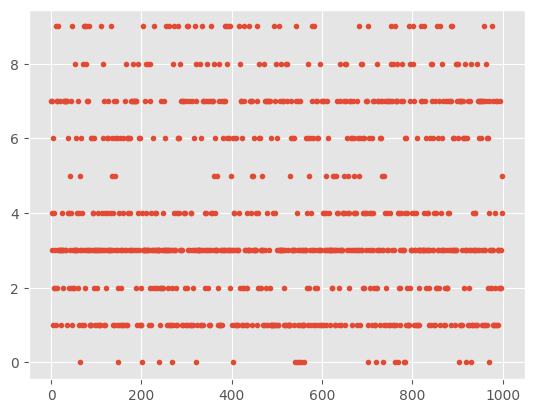

In [90]:
plt.plot(y_kmeans,".")
plt.show()

In [91]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

**Output**

Recommendation of product based on the current product selected by user.

To recommend related product based on, Frequently bought together.

**Top words in each cluster based on product description**

In [93]:
## optimal cluster is

true_k =10
model= KMeans(n_clusters=true_k, init = 'k-means++' ,max_iter=100 , n_init= 1)
model.fit(X1)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In [97]:
print("Top terms per clusters: ")
order_centroids=model.cluster_centers_.argsort()[:,::-1]
terms=vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per clusters: 
Cluster 0:
 volt
 power
 speed
 battery
 lithium
 ion
 tool
 engine
 protection
 plan
Cluster 1:
 air
 cooking
 heat
 water
 cooling
 000
 control
 ft
 cu
 oven
Cluster 2:
 tape
 rug
 removal
 vary
 100
 film
 carpet
 high
 slightly
 patio
Cluster 3:
 light
 watt
 bulbs
 fan
 bulb
 fixture
 led
 lighting
 ceiling
 included
Cluster 4:
 concrete
 wood
 proposition
 nbsp
 65
 california
 residents
 ft
 paint
 vary
Cluster 5:
 storage
 door
 easy
 shelves
 adjustable
 lbs
 ft
 use
 home
 shelf
Cluster 6:
 stone
 tile
 natural
 flooring
 insulation
 installation
 outdoor
 patio
 piece
 use
Cluster 7:
 water
 toilet
 watering
 design
 tank
 flush
 bowl
 easy
 handle
 spray
Cluster 8:
 post
 fence
 ft
 posts
 gate
 steel
 fencing
 wood
 plate
 treated
Cluster 9:
 metal
 steel
 drill
 hole
 screws
 screw
 door
 plated
 use
 fuses


In [98]:
#Predicting clusters based on key search words
def recommendations(product):
    #print cluster ID
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print prediction
    print_cluster(prediction[0])

In [101]:
#keyword : cutting tools
recommendations('cutting tool')

Cluster 0:
 volt
 power
 speed
 battery
 lithium
 ion
 tool
 engine
 protection
 plan


In [102]:
#keyword : spray paint
recommendations('spray paint')

Cluster 4:
 concrete
 wood
 proposition
 nbsp
 65
 california
 residents
 ft
 paint
 vary


In [107]:
recommendations('home')

Cluster 5:
 storage
 door
 easy
 shelves
 adjustable
 lbs
 ft
 use
 home
 shelf


In [108]:
recommendations('water')

Cluster 7:
 water
 toilet
 watering
 design
 tank
 flush
 bowl
 easy
 handle
 spray
